# Implementing Linear Regression and interpreting the evaluation result

https://www.kaggle.com/sinaasappel/tutorial-multiple-regression/data

### Install libraries

In [67]:
install.packages('DataCombine')
install.packages('gridExtra')
install.packages("ggcorrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Load libraries

In [68]:
library(ggplot2)
library(ggcorrplot)
library(gridExtra)
library(DataCombine)

### Load and read dataset from local disk

Source: https://www.kaggle.com/altavish/boston-housing-dataset

Datafields:  
CRIM : CrimeRate,   
ZN : ZonedRatio,   
INDUS : IndusRatio,   
CHAS: AlongRiver,   
NOX: NO2Level,   
RM: RoomsPerHouse,   
AGE: OldHomeRatio,   
DIS: DisFromCenter,    
RAD: RoadAccessIndex,   
TAX: PropTaxRate,   
PTRATIO: PupilTeacherRatio,   
MEDV: MedianHomeValue

In [44]:
house_data <- read.csv('datasets/HousingData.csv')

head(house_data, 5)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


In [45]:
dim(house_data)

[1] 506  12

### Rename columns name for meaning full

In [49]:
col_names <- c('CrimeRate', 'ZonedRatio', 'IndusRatio', 
               'AlongRiver', 'NO2Level', 'RoomsPerHouse', 
               'OldHomeRatio', 'DisFromCenter', 'RoadAccessIndex', 
               'PropTaxRate', 'PupilTeacherRatio', 'MedianHomeValue')

colnames(house_data) <- col_names

head(house_data)

CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,28.7


### Structure of dataset

In [50]:
str(house_data)

'data.frame':	506 obs. of  12 variables:
 $ CrimeRate        : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZonedRatio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ IndusRatio       : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ AlongRiver       : int  0 0 0 0 0 0 NA 0 0 NA ...
 $ NO2Level         : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RoomsPerHouse    : num  6.58 6.42 7.18 7 7.15 ...
 $ OldHomeRatio     : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DisFromCenter    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RoadAccessIndex  : int  1 2 2 3 3 3 5 5 5 5 ...
 $ PropTaxRate      : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PupilTeacherRatio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ MedianHomeValue  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


### check empty cell in data frame 

In [51]:
colSums(is.na(house_data))

CrimeRate        ZonedRatio        IndusRatio        AlongRiver 
               20                20                20                20 
         NO2Level     RoomsPerHouse      OldHomeRatio     DisFromCenter 
                0                 0                20                 0 
  RoadAccessIndex       PropTaxRate PupilTeacherRatio   MedianHomeValue 
                0                 0                 0                 0

### Remove empty cell applying a loop

In [52]:
house_data <- DropNA(house_data)

No Var specified. Dropping all NAs from the data frame.

94 rows dropped from the data frame because of missing values.


In [53]:
colSums(is.na(house_data))

CrimeRate        ZonedRatio        IndusRatio        AlongRiver 
                0                 0                 0                 0 
         NO2Level     RoomsPerHouse      OldHomeRatio     DisFromCenter 
                0                 0                 0                 0 
  RoadAccessIndex       PropTaxRate PupilTeacherRatio   MedianHomeValue 
                0                 0                 0                 0

In [54]:
dim(house_data)

[1] 412  12

In [55]:
options(repr.plot.width = 6, repr.plot.height = 4)

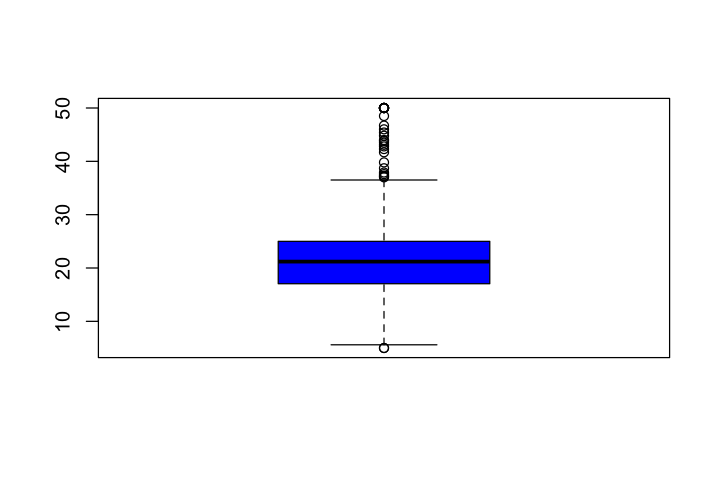

In [56]:
boxplot(house_data$MedianHomeValue, col = 'blue')

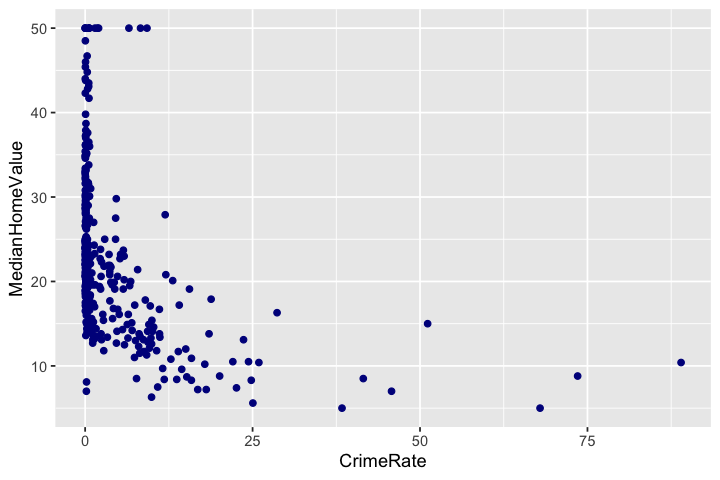

In [57]:
CRIM_MEDV_plot <- ggplot(house_data, aes( x = CrimeRate, y = MedianHomeValue)) + 
                         geom_point(col = 'darkblue')
CRIM_MEDV_plot

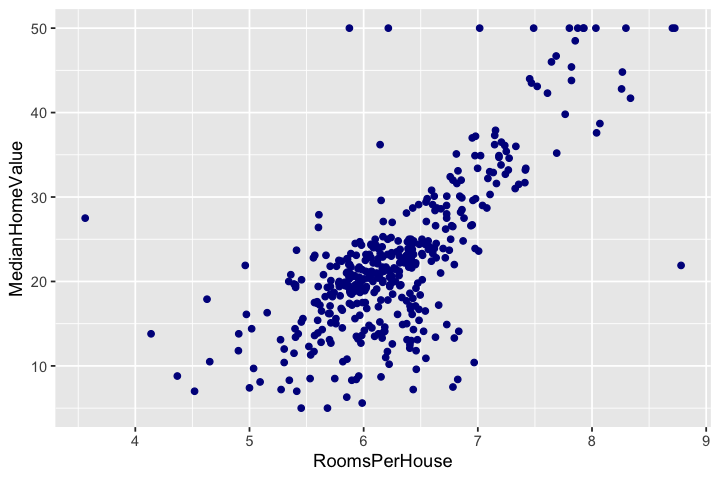

In [59]:
RM_MEDV_plot <- ggplot(house_data, aes( x = RoomsPerHouse, y = MedianHomeValue)) + 
                geom_point(col = 'darkblue')

RM_MEDV_plot

In [69]:
house_data_corr <- round(cor(house_data), 1)

house_data_corr

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
CrimeRate,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.3,-0.4,0.6,0.6,0.3,-0.4
ZonedRatio,-0.2,1.0,-0.5,0.0,-0.5,0.3,-0.6,0.6,-0.3,-0.3,-0.4,0.4
IndusRatio,0.4,-0.5,1.0,0.0,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.5
AlongRiver,-0.1,0.0,0.0,1.0,0.1,0.1,0.1,-0.1,0.0,0.0,-0.1,0.2
NO2Level,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.5
RoomsPerHouse,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.3,0.2,-0.2,-0.3,-0.4,0.7
OldHomeRatio,0.3,-0.6,0.6,0.1,0.7,-0.3,1.0,-0.7,0.5,0.5,0.3,-0.4
DisFromCenter,-0.4,0.6,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3
RoadAccessIndex,0.6,-0.3,0.6,0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.4,-0.4
PropTaxRate,0.6,-0.3,0.7,0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.4,-0.5


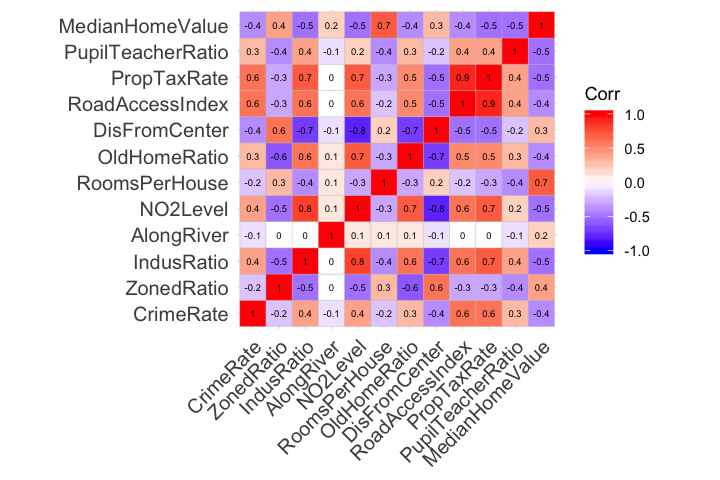

In [70]:
library(ggcorrplot)

ggcorrplot(house_data_corr, lab = TRUE, lab_size = 2)

### Regression line for one predictor value (age) and one output value 

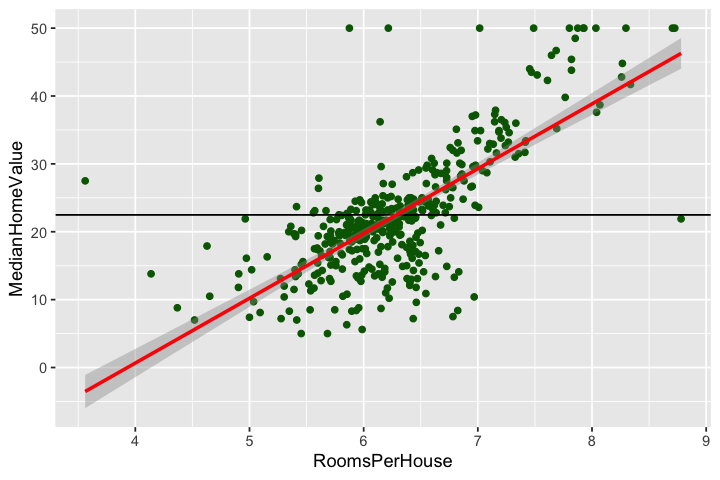

In [71]:
ggplot(house_data, aes(x = RoomsPerHouse, y = MedianHomeValue)) +
       geom_point(col = 'darkgreen') +
       geom_hline(yintercept = mean(house_data$MedianHomeValue)) +
       geom_smooth(method = 'lm', col ='red')

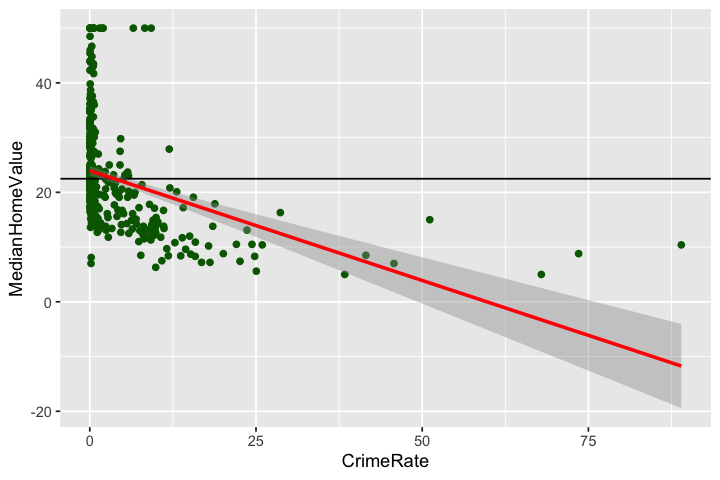

In [72]:
ggplot(house_data, aes(x = CrimeRate, y = MedianHomeValue)) +
       geom_point(col = 'darkgreen') +
       geom_hline(yintercept = mean(house_data$MedianHomeValue)) +
       geom_smooth(method = 'lm', col ='red')

## Create models

### Simple linear regression)

In [73]:
model_01 <- lm(MedianHomeValue ~ RoomsPerHouse, data = house_data)

summary(model_01)


Call:
lm(formula = MedianHomeValue ~ RoomsPerHouse, data = house_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.3789  -2.4114   0.2172   3.0347  31.4483 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -37.5232     2.8017  -13.39   <2e-16 ***
RoomsPerHouse   9.5447     0.4429   21.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.27 on 410 degrees of freedom
Multiple R-squared:  0.5311,	Adjusted R-squared:   0.53 
F-statistic: 464.4 on 1 and 410 DF,  p-value: < 2.2e-16


__Inference from the above summary table.__

[more info](https://www.guru99.com/r-simple-multiple-linear-regression.html) and [more](http://www.sthda.com/english/articles/40-regression-analysis/163-regression-with-categorical-variables-dummy-coding-essentials-in-r/)

* The estimated value of `RoomsPerHouse` w.r.t `MedianHomeValue` of house dataset is `+ve` value that implies that positive relationship between `RoomsPerHouse` and `MedianHomeValue`

__Check statistically impact or not?__

In above summary table you can see that `p-value` of `RoomsPerHouse` is less than `0.05` that means ststistically impact.

__Assumption of hypothesis__

* H0: No statistical impact on `target` variable.
* H1: The predictor has a meaningful impact on `target` variable.

__Note:-__

* If `p-value` is less than significance value(`0.05`) then predicter has statistically impact  to target variable else not.

* `Adjusted R-squared` it explain variance by above model, is `0.3276` i.e `32.8%` as increases as more better model. Here is one predictor let's increase predictor values and check statistically impact or not and find `Adjusted R-square` value. 

### ANOVA test to estimate the effect of each feature on the variances with the `anova() `function.

In [74]:
library(car)

Loading required package: carData


In [75]:
anova(model_01)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
RoomsPerHouse,1,18258.24,18258.24088,464.392,2.007655e-69
Residuals,410,16119.74,39.31644,NA,NA


__In above result you can see  that `p-value` is less than `0.05` that means statistically impact__ 

### Residual against different measures
Note:-  This is more conventional way to estimate the model performance is to display the residual against different measures.

https://data.library.virginia.edu/diagnostic-plots/

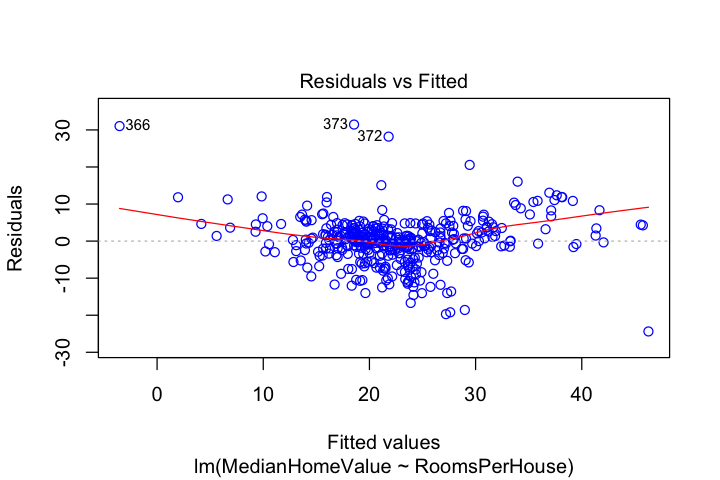

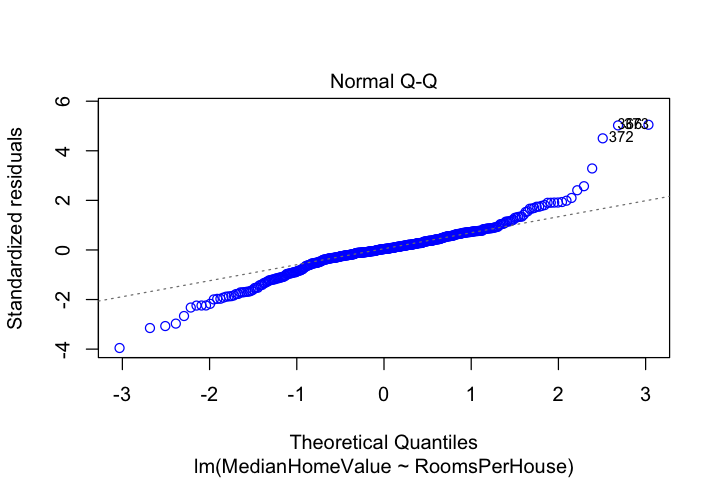

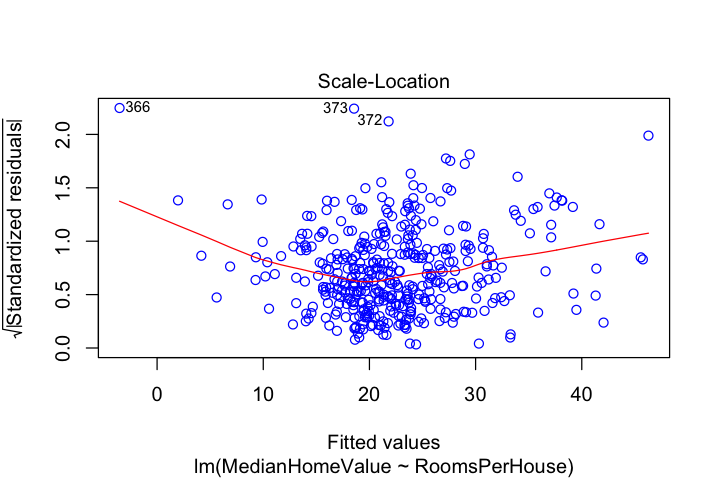

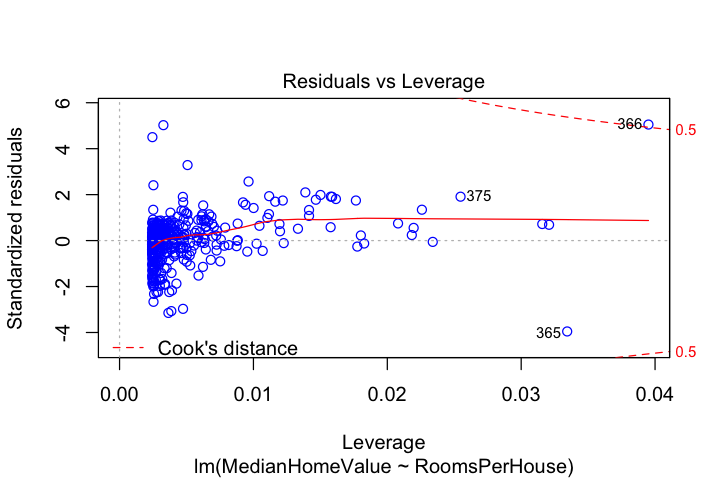

In [76]:
plot(model_01, col = 'blue')

In [78]:
colnames(house_data)

[1] "CrimeRate"         "ZonedRatio"        "IndusRatio"       
 [4] "AlongRiver"        "NO2Level"          "RoomsPerHouse"    
 [7] "OldHomeRatio"      "DisFromCenter"     "RoadAccessIndex"  
[10] "PropTaxRate"       "PupilTeacherRatio" "MedianHomeValue"

In [80]:
model_02 <- lm(MedianHomeValue ~ CrimeRate + RoomsPerHouse, data = house_data)

summary(model_02)


Call:
lm(formula = MedianHomeValue ~ CrimeRate + RoomsPerHouse, data = house_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.593  -2.664  -0.323   2.544  32.269 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -32.00178    2.73568 -11.698  < 2e-16 ***
CrimeRate      -0.24450    0.03289  -7.433 6.26e-13 ***
RoomsPerHouse   8.80917    0.42783  20.590  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.893 on 409 degrees of freedom
Multiple R-squared:  0.5869,	Adjusted R-squared:  0.5849 
F-statistic: 290.5 on 2 and 409 DF,  p-value: < 2.2e-16


### Graphical view of model

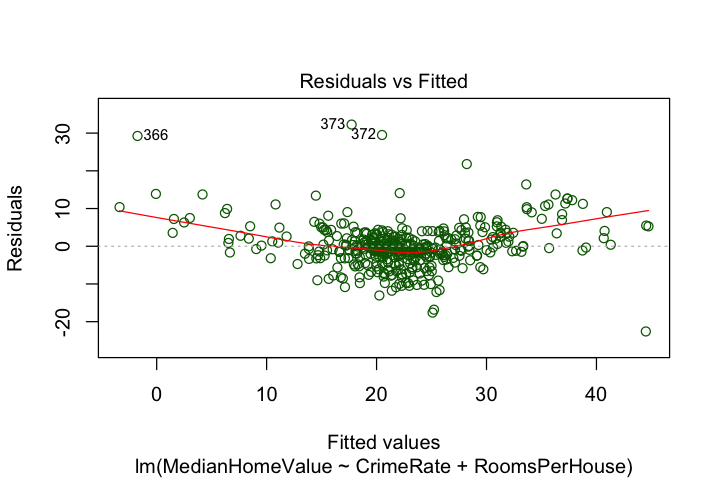

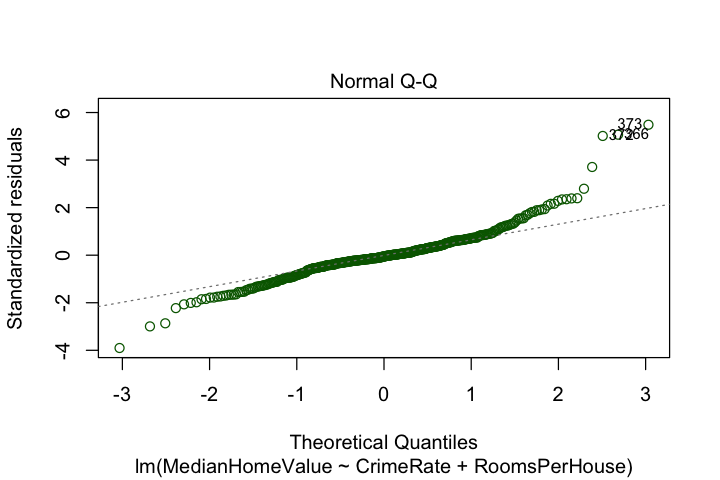

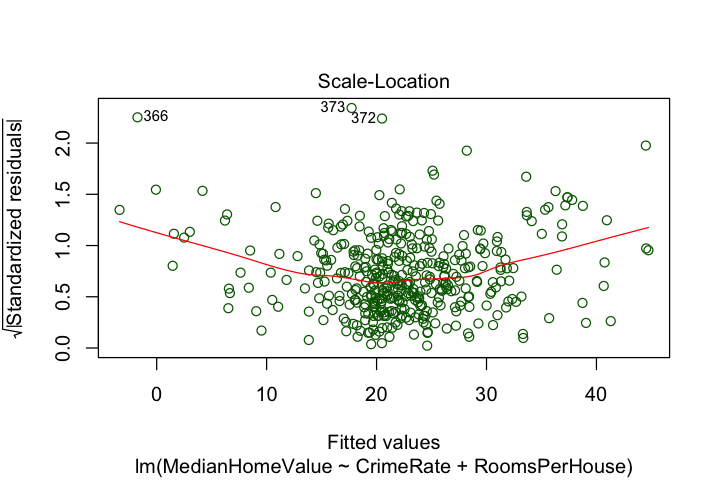

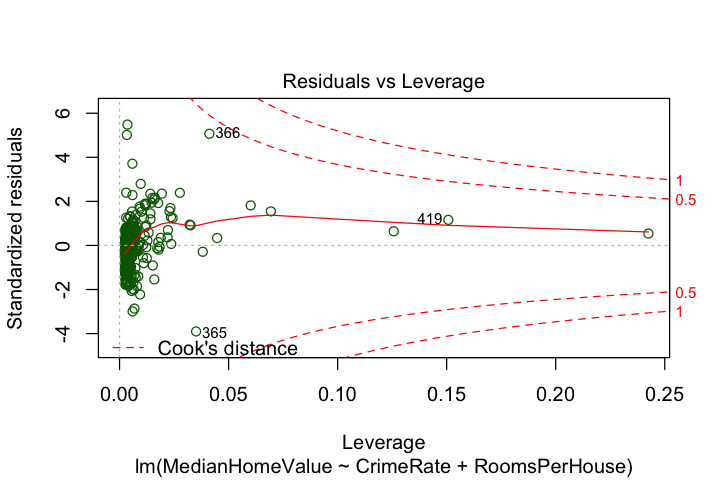

In [81]:
plot(model_02, col = 'darkgreen')

### Anova test between two model_01 and model_02

__In below output shows that the F-value is 42.00, and with a p<0.001 we know that the change in explained variance is significant. Note that you can compare only hierarchical models. So the second model should contain all variables from the first model plus some new and the third model should contain all variables from the second model plus some new and so on.__

https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/

https://stats.stackexchange.com/questions/115304/interpreting-output-from-anova-when-using-lm-as-input

https://stats.stackexchange.com/questions/152514/how-to-use-anova-for-two-models-comparison

https://bookdown.org/ndphillips/YaRrr/comparing-regression-models-with-anova.html

In [89]:
anova(model_01, model_02)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
410,16119.74,NA,NA,NA,NA
409,14201.23,1,1918.507,55.25361,6.258504e-13


In [83]:
model_03 <- lm(MedianHomeValue ~ ., data = house_data)

summary(model_03)


Call:
lm(formula = MedianHomeValue ~ ., data = house_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.0176  -2.5584  -0.3798   1.8206  30.4650 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        23.987956   5.495410   4.365 1.62e-05 ***
CrimeRate          -0.160644   0.034630  -4.639 4.75e-06 ***
ZonedRatio          0.037477   0.015548   2.410 0.016390 *  
IndusRatio          0.006625   0.071689   0.092 0.926420    
AlongRiver          3.006201   0.993255   3.027 0.002633 ** 
NO2Level          -20.988573   4.568959  -4.594 5.84e-06 ***
RoomsPerHouse       6.419614   0.412854  15.549  < 2e-16 ***
OldHomeRatio       -0.052215   0.014399  -3.626 0.000325 ***
DisFromCenter      -1.461837   0.227270  -6.432 3.60e-10 ***
RoadAccessIndex     0.254875   0.074799   3.407 0.000722 ***
PropTaxRate        -0.014321   0.004292  -3.337 0.000927 ***
PupilTeacherRatio  -0.960332   0.152387  -6.302 7.77e-10 ***
---
Signif. codes:  0 ‘***’ 

In the above summary result, `p-value` of AlongRiver is greter than `0.05` that means in absence of AlongRiver predictor doesn't effect the above model_03. 

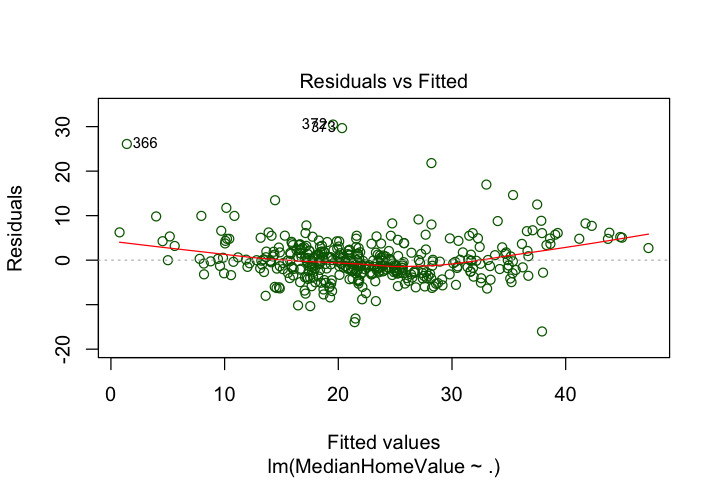

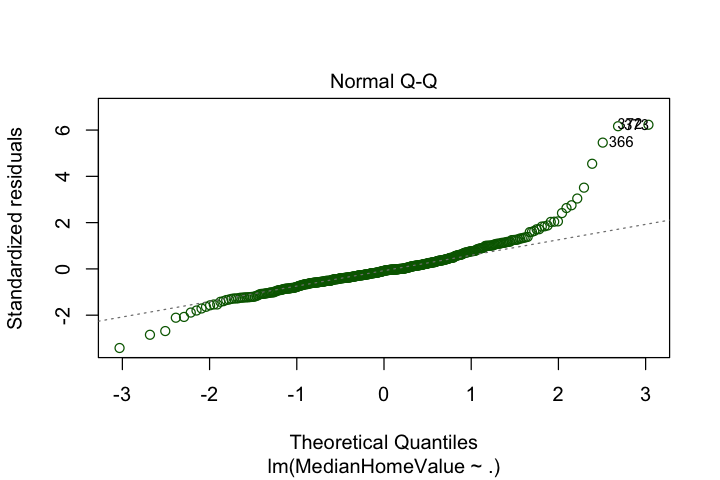

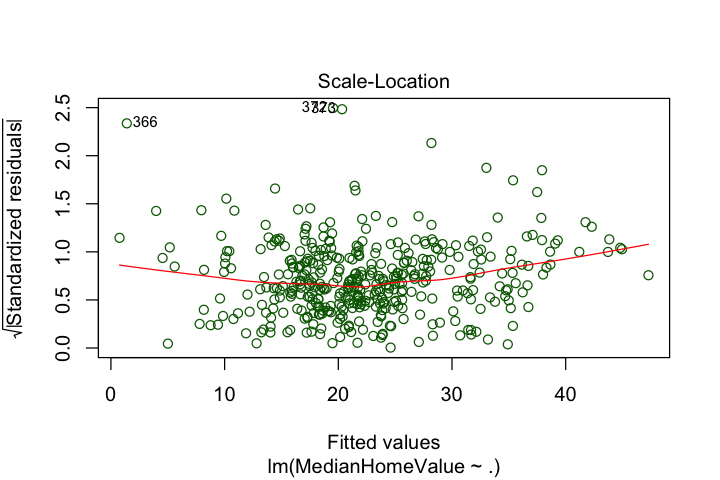

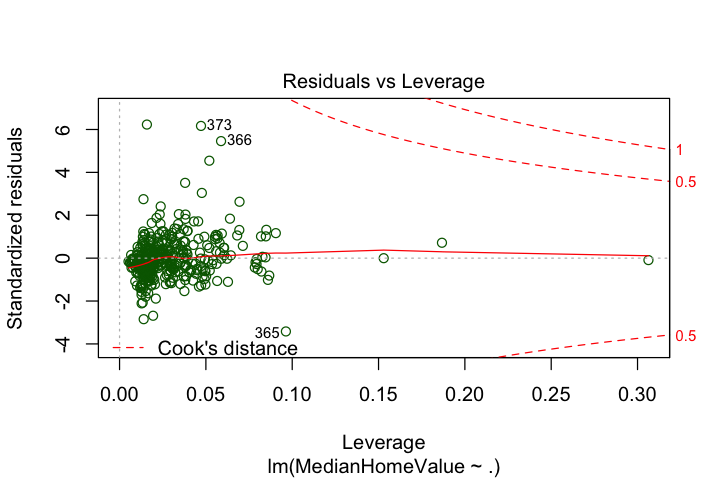

In [84]:
plot(model_03, col = 'darkgreen')

Note:- Here I removing `IndusRatio` because of `IndusRatio` less statistically impactful than other except `AlongRiver.

In [87]:
model_04 <- lm(MedianHomeValue ~ CrimeRate + ZonedRatio  +
               NO2Level + RoomsPerHouse + OldHomeRatio + DisFromCenter + 
               RoadAccessIndex + PropTaxRate + PupilTeacherRatio , data = house_data)

summary(model_04)


Call:
lm(formula = MedianHomeValue ~ CrimeRate + ZonedRatio + NO2Level + 
    RoomsPerHouse + OldHomeRatio + DisFromCenter + RoadAccessIndex + 
    PropTaxRate + PupilTeacherRatio, data = house_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.221  -2.537  -0.420   1.814  32.394 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        24.513053   5.526232   4.436 1.19e-05 ***
CrimeRate          -0.169089   0.034826  -4.855 1.72e-06 ***
ZonedRatio          0.038204   0.015600   2.449 0.014755 *  
NO2Level          -20.416420   4.420786  -4.618 5.22e-06 ***
RoomsPerHouse       6.478327   0.412099  15.720  < 2e-16 ***
OldHomeRatio       -0.051378   0.014525  -3.537 0.000451 ***
DisFromCenter      -1.508627   0.224369  -6.724 6.09e-11 ***
RoadAccessIndex     0.275121   0.071555   3.845 0.000140 ***
PropTaxRate        -0.015312   0.003781  -4.050 6.16e-05 ***
PupilTeacherRatio  -0.991496   0.151885  -6.528 2.01e-10 ***
---
Signif. codes: 

In above summary, `Adjusted R-squared = 0.6799 ` i.e 68% that means model doesn't effect after removing features. Let's check model_04 is better than previous model_03 by using anova test. 

### Anova test for two model

In [90]:
anova(model_04, model_03)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
402,9944.966,NA,NA,NA,NA
400,9718.860,2,226.1051,4.652914,0.01005571


In above result, `F-values` just positive and `p-value` is less than `0.05` that's mean model_04 very slightly improve. 